<a href="https://colab.research.google.com/github/sasansharee/Sasan_MMA_Assisgnments/blob/main/ML_Regression_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset bike_day_raw.csv, which has the regression target cnt. This dataset is hourly bike rentals in the citybike platform. The cnt column is the number of rentals, which we want to predict from date and weather data.

* Split the data into a training and a test set using train_test_split.
* se the LinearRegression class to learn a regression model on this data.
* You can evaluate with the score method, which provides the R^2or using the mean_squared_error function from sklearn.metrics (Challenge: You can also write it yourself in numpy).






In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [344]:
df= pd.read_csv('/content/bike_day_raw.csv')

In [345]:
df.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [346]:
X = df.drop('cnt', axis = 1)
y = df['cnt']

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [348]:
lr = LinearRegression()

In [349]:
lr.fit(X_train, y_train)

LinearRegression()

In [350]:
lr.score(X_train, y_train)

0.5328925529498699

In [351]:
lr.score(X_test, y_test)

0.49910337568762697

In [352]:
lr.coef_.shape

(10,)

In [353]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((548, 10), (183, 10), (548,), (183,))

In [354]:
n_train = X_train.shape[0]
y_train_hat = lr.predict(X_train)
mse_train = np.sum((y_train_hat - y_train)**2) / n_train
mse_train

np.float64(1643577.0098603943)

In [355]:
mse_train_sk = mean_squared_error(y_train, lr.predict(X_train))
mse_train_sk

1643577.0098603943

In [356]:
n = X_test.shape[0]
y_test_hat = lr.predict(X_test)
mse_test = np.sum((y_test_hat - y_test)**2) / X_test.shape[0]
mse_test

np.float64(2220717.208700472)

In [357]:
mse_test_sk = mean_squared_error(y_test, lr.predict(X_test))
mse_test_sk

2220717.208700472

In [358]:
y_train_bar = np.mean(y_train)
ss_reg = np.sum((lr.predict(X_train) - y_train_bar) ** 2)
ss_total = np.sum((y_train - y_train_bar) ** 2)
r2 = ss_reg / ss_total
r2

np.float64(0.5328925529498706)

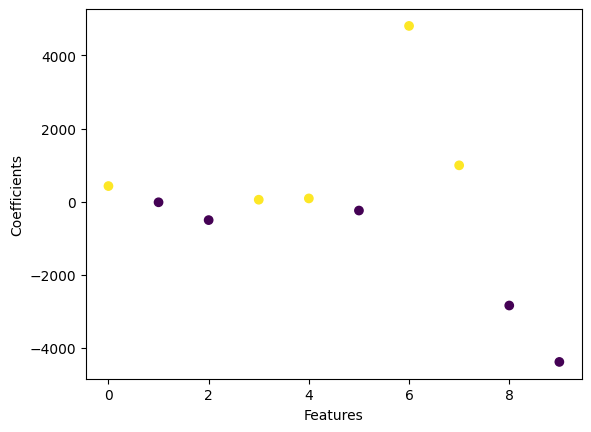

In [359]:
plt.scatter(range(lr.coef_.shape[0]), y = lr.coef_, c = np.sign(lr.coef_))
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

Load the diabetes dataset using sklearn.datasets.load_diabetes.

* Scale the dataset (you can be creative and make pipelines)
* Apply LinearRegression
* Apply Ridge and do grid search
* Apply Lasso and do grid search
* Visualize the coefficients







In [360]:
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [361]:
diabetes = load_diabetes()

In [362]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [363]:
X = diabetes['data']
y = diabetes['target']

In [364]:
X.shape, y.shape

((442, 10), (442,))

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [366]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 10), (111, 10), (331,), (111,))

In [367]:
pipe_lr = Pipeline(steps = [('imputer', SimpleImputer()),
                             ('scaler', StandardScaler()),
                             ('lr', LinearRegression())])

In [368]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('lr', LinearRegression())])

In [369]:
pipe_lr.score(X_train, y_train), pipe_lr.score(X_test, y_test)

(0.5631314381625021, 0.32770923648226025)

In [370]:
coeff_lr = pipe_lr.named_steps['lr'].coef_

In [371]:
coeff_lr[0]

np.float64(1.2713187078483863)

In [372]:
n_lr = pipe_lr.named_steps['scaler'].fit_transform(X_train).shape[1]

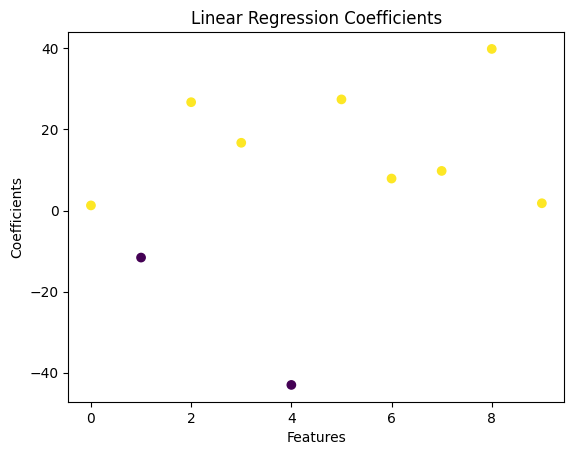

In [373]:
plt.scatter(range(n_lr), coeff_lr, c = np.sign(coeff_lr))
plt.title('Linear Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

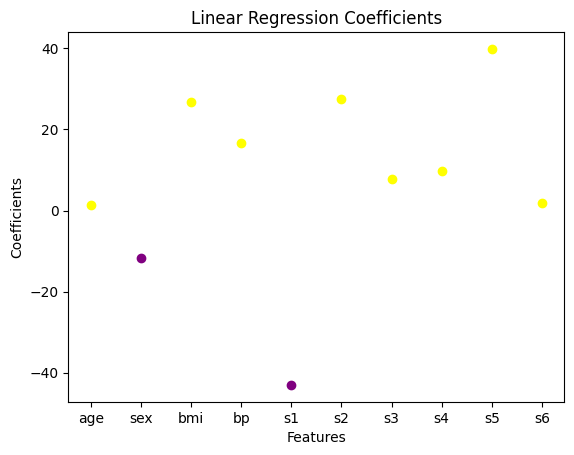

In [374]:
for i in range(n_lr):
  plt.scatter(diabetes['feature_names'][i], coeff_lr[i], color = 'yellow' if coeff_lr[i] > 0 else 'purple')
plt.title('Linear Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

In [375]:
pipe_ridge = Pipeline(steps = [('imputer', SimpleImputer()),
                               ('scaler', StandardScaler()),
                               ('ridge', Ridge(alpha = 10))])

In [376]:
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=10))])

In [377]:
pipe_ridge.score(X_train, y_train), pipe_ridge.score(X_test, y_test)

(0.5599571786869324, 0.3337614475734353)

In [378]:
coeff_ridge = pipe_ridge.named_steps['ridge'].coef_
n_ridge = pipe_ridge.named_steps['scaler'].fit_transform(X_train).shape[1]

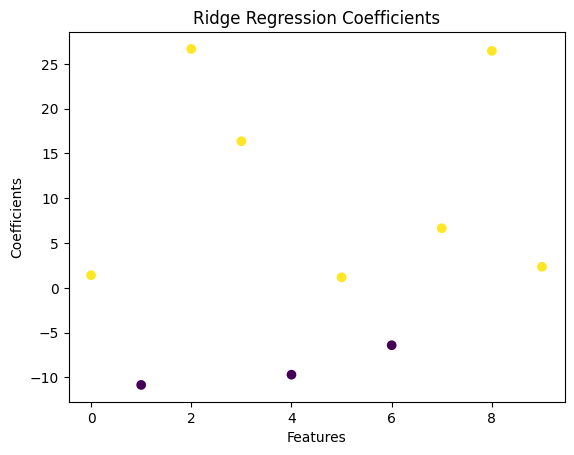

In [379]:
plt.scatter(range(n_ridge), coeff_ridge, c = np.sign(coeff_ridge))
plt.title('Ridge Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

In [380]:
param_ridge = {'ridge__alpha' : np.logspace(-3, 3, 13)}

In [381]:
grid_ridge = GridSearchCV(pipe_ridge, param_ridge, cv = 10, return_train_score = True)

In [382]:
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('ridge', Ridge(alpha=10))]),
             param_grid={'ridge__alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])},
             return_train_score=True)

In [383]:
grid_ridge.best_params_

{'ridge__alpha': np.float64(0.1)}

In [384]:
grid_ridge.best_score_

np.float64(0.5185539092740677)

In [385]:
grid_ridge_results = pd.DataFrame(grid_ridge.cv_results_)

In [386]:
grid_ridge_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_ridge__alpha', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

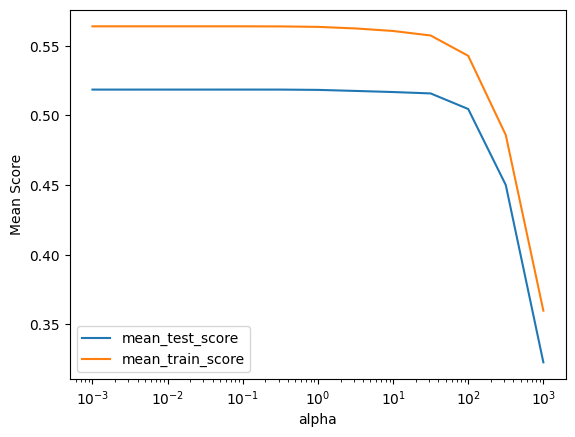

In [387]:
grid_ridge_results.plot ('param_ridge__alpha', 'mean_test_score')
grid_ridge_results.plot ('param_ridge__alpha', 'mean_train_score', ax = plt.gca())
plt.xscale('log')
plt.ylabel('Mean Score')
plt.xlabel('alpha')
plt.show()

In [388]:
pipe_lasso = Pipeline(steps = [('imputer', SimpleImputer()),
                               ('scaler', StandardScaler()),
                               ('lasso', Lasso(alpha = 10))])

In [389]:
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=10))])

In [390]:
pipe_lasso.score(X_train, y_train), pipe_lasso.score(X_test, y_test)

(0.5073020109735957, 0.3415141262056878)

In [391]:
coeff = pipe_lasso.named_steps['lasso'].coef_
n_lasso = pipe_lasso.named_steps['scaler'].fit_transform(X_train).shape[1]

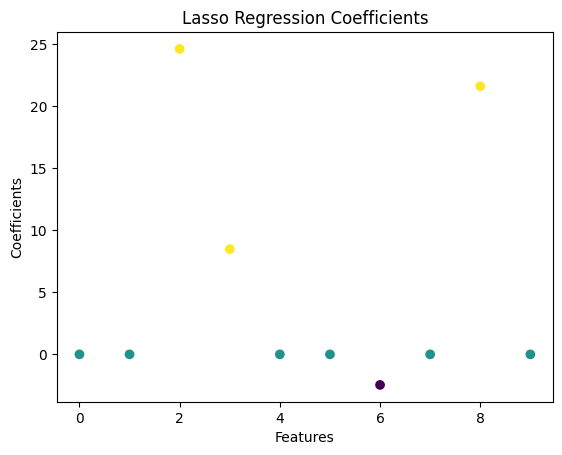

In [392]:
plt.scatter(range(n_lasso), coeff, c = np.sign(coeff))
plt.title('Lasso Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

In [393]:
param_lasso = {'lasso__alpha' : np.logspace(-3, 3, 13)}

In [394]:
grid_lasso = GridSearchCV(pipe_lasso, param_grid = param_lasso, cv = 10, return_train_score = True)

In [395]:
grid_lasso.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('lasso', Lasso(alpha=10))]),
             param_grid={'lasso__alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])},
             return_train_score=True)

In [396]:
grid_lasso.best_params_

{'lasso__alpha': np.float64(0.001)}

In [397]:
grid_lasso.best_score_

np.float64(0.5185374447742823)

In [398]:
grid_lasso_results = pd.DataFrame(grid_lasso.cv_results_)

In [399]:
grid_lasso_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_lasso__alpha', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

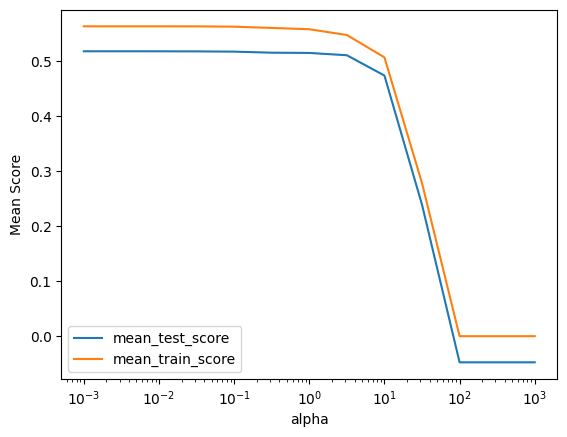

In [400]:
grid_lasso_results.plot('param_lasso__alpha', 'mean_test_score')
grid_lasso_results.plot('param_lasso__alpha', 'mean_train_score', ax = plt.gca())
plt.xscale('log')
plt.ylabel('Mean Score')
plt.xlabel('alpha')
plt.show()